# Assignment M2.2

# init

Include any initialization and paste any function needed here...

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Q1

If a force $F\,(N)$ is applied to compress a spring, its displacement $x\,(m)$ can often be modeled by Hooke's law $F=k\,x$
where $k$ is the spring constant $(N/m)$. The potential energy stored in the spring $U\,(J)$ can then be computed as
$U={1 \over 2} k x^2$. Five springs are tested and the following data compiled:
\begin{align*}
&F\,(N) && 18 && 22&& 12&& 13 &&17\\
&x\,(m) && 0.013 && 0.020 && 0.009 && 0.010 && 0.012
\end{align*}
Use Python to store $F$ and $x$ as vectors and then compute vectors of the spring constants and the potential energies. Use the `max` function of `numpy` to determine the maximum potential energy.

In [47]:
# Q1 answer
F = np.array([18, 22, 12, 13, 17])
x = np.array([0.013, 0.020, 0.009, 0.010, 0.012])

k, c = np.polyfit(x, F, 1)

U = .5 * k * x**2

U_max = np.max(U)

print(f'U_max = {U_max} J')


U_max = 0.17754010695187172 J


# Q2

 It is general practice in engineering and science that equations be plotted as lines and discrete data as symbols. The data for concentration $c$ versus time $t$ for the photodegradation of aqueous bromine are given below.
 $$\begin{align*}
&t\,(\mathrm{min}) && 10	 && 20  && 30  && 40  && 50  && 60\\
&c\,(\mathrm{ppm}) && 3.4 && 2.6 && 1.6 && 1.3 && 1.0 && 0.5
\end{align*}$$

These data can be described by the following function: $c=4.8\,e^{-0.034t}$

Use Python to create a plot displaying the data (using diamond-shaped, filled-red symbols) and the function (using a green, dashed line). Plot the function for $t = 0$ to $70$ with increments of $1$ min.

1.   Plot the data and the function on the same plot.
2.   Plot the data and the function on two seperate horizontal sub-plots.
3.   Find the minimum value of the array $c$ that you calculated from the function (use `min`function of `numpy`).

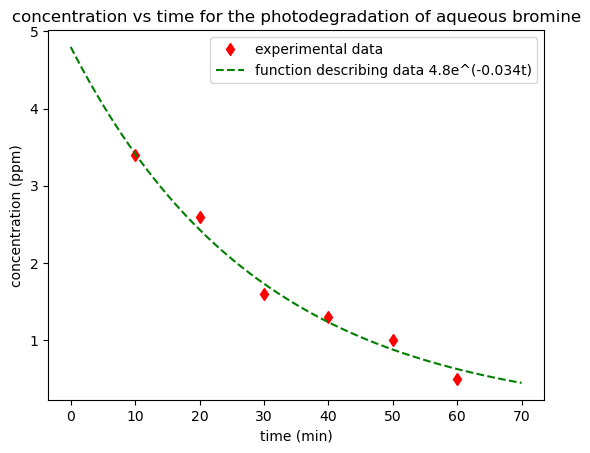

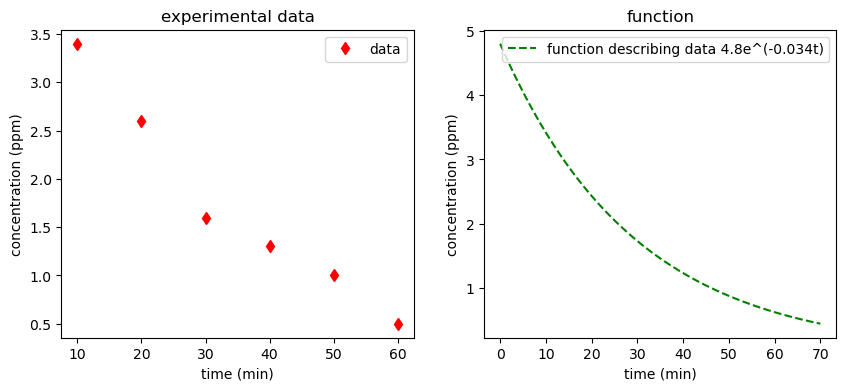

min(function) = 0.44424277204964757


In [73]:
# Q2 answer
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.4, 2.6, 1.6, 1.3, 1.0, 0.5])

t_eq = np.linspace(0, 70, 71)
c_eq = lambda t: 4.8 * np.exp(-0.034*t)

plt.title("concentration vs time for the photodegradation of aqueous bromine")
plt.xlabel("time (min)")
plt.ylabel("concentration (ppm)")
plt.plot(t, c, 'rd', label='experimental data')
plt.plot(t_eq, c_eq(t_eq), 'g--', label='function describing data 4.8e^(-0.034t)')
plt.legend()

fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].plot(t, c, 'rd', label='data')
axes[1].plot(t_eq, c_eq(t_eq), 'g--', label='function describing data 4.8e^(-0.034t)')

axes[0].set_xlabel("time (min)")
axes[1].set_xlabel("time (min)")

axes[0].set_ylabel("concentration (ppm)")
axes[1].set_ylabel("concentration (ppm)")

axes[0].set_title("experimental data")
axes[1].set_title("function")

axes[0].legend()
axes[1].legend()

plt.show()

print(f"min(function) = {np.min(c_eq(t_eq))}")




# Q3

The Maclaurin series expansion for the cosine is
$
\cos(x)=1-{x^2\over2!}+{x^4\over4!}-{x^6\over6!}+{x^8\over8!}-\ldots
$

Use python to create a plot of the cosine (blue solid line) along with a plot of the series expansion (black dashed line) up to and including the term ${x^8\over8!}$. Use the built-in function `factorial` of `math` package in computing the series expansion. Make the range of the abscissa from $x = 0$ to $3 \pi /2$. Find $\cos(1.2 \pi)$ from the series.


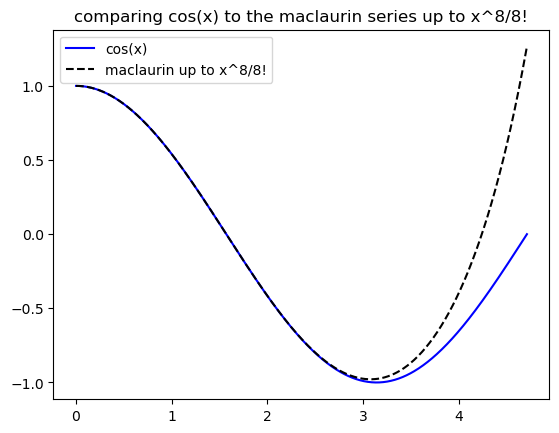

cos_approx(1.2*pi) = -0.6651643314173705


In [62]:
# Q3 answer
from math import factorial

def cos_approx(x):
    total = 0
    for i in range(5):
        total += (-1)**i * x**(2*i) / factorial(2*i)
    return total

x = np.linspace(0, 3. * np.pi / 2., 701)

plt.title('comparing cos(x) to the maclaurin series up to x^8/8!')
plt.plot(x, np.cos(x), 'b-', label='cos(x)')
plt.plot(x, cos_approx(x), 'k--', label='maclaurin up to x^8/8!')
plt.legend()
plt.show()

P = cos_approx(1.2*np.pi)

print(f"cos_approx(1.2*pi) = {P}")

# Q4

Develop a function that is passed a numeric grade from 0 to 100 and returns a letter grade according to the scheme

\begin{align*}
& Letter	&& Criteria\\
& A	&& 90 \le numeric\ grade \le 100\\
& B	&& 80 \le numeric\ grade < 90\\
& C	&& 70 \le numeric\ grade < 80\\
& D	&& 60 \le numeric\ grade < 70\\
& F	&& \ \ \ \ \ \ \ \ \ numeric\ grade < 60\\
\end{align*}

The prototype of the function is as follows. Design the function so that it displays an error message and terminates in the event that the user enters a value of score that is less than zero or greater than 100. Test your function with 89.9999, 90, 45, 120 and -10.

In [50]:
# Q4 answer
def lettergrade(score):
  grade = 'F'
  if score > 100 or score < 0:
    grade = None
    print("Error: Input grade out of bounds!")
  elif score >= 90:
    grade = 'A'
  elif score >= 80:
    grade = 'B'
  elif score >= 70:
    grade = 'C'
  elif score >= 60:
    grade = 'D'
  else:
    grade = 'F'
  return grade

print(f"89.9999 = {lettergrade(89.9999)}")
print(f"90 = {lettergrade(90)}")
print(f'45 = {lettergrade(45)}')
print(f'120 = {lettergrade(120)}')
print(f'-10 = {lettergrade(-10)}')


89.9999 = B
90 = A
45 = F
Error: Input grade out of bounds!
120 = None
Error: Input grade out of bounds!
-10 = None


# Q5

Economic formulas are available to compute annual payments for loans. Suppose that you borrow an amount of money $P$ and agree to repay it in $n$ annual payments at an interest rate of $i$. The formula to compute the annual payment $A$ is
\begin{equation}
A=P{i(1+i)^n\over (1+i)^n-1}
\end{equation}

Write a python code to compute $A$. Test it with $P = \$100,000$ and an interest rate of $3.3\% (i = 0.033)$. Compute results for $n = 1, 2, 3, 4$, and $5$ and display the results as a table with headings and columns for $n$ and $A$.


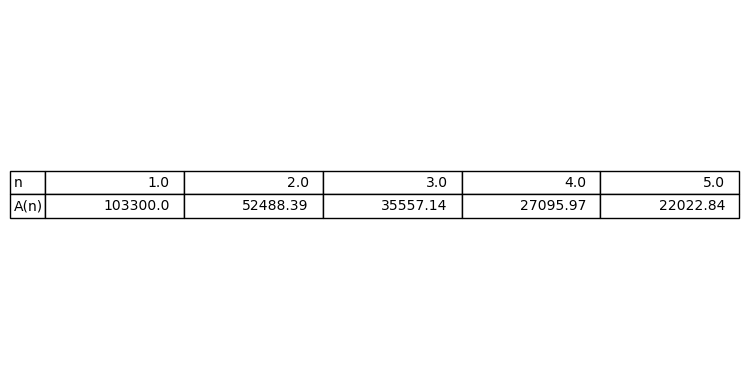

In [51]:
# Q5 answer

P0 = 100000
i = 0.033

n = np.linspace(1,5, 5)

A = lambda n: P0*i*((1+i)**n)/(((1+i)**n) - 1)

table_data = [[ni, round(A(ni), 2)] for ni in n]
table_data = np.transpose(table_data)

row_headers = ['n', 'A(n)']

fig, ax = plt.subplots()
ax.axis('off')

table = plt.table(cellText=table_data, rowLabels=row_headers, loc='center')
table.scale(1.4, 1.4)
plt.show()

